<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 4</center></h1>

- Nome completo: <Vinicius Gonçalves Paraizo Borges>
- [Link para vídeo](<https://youtu.be/VDBCbHlxD5Q>)

# (1) GLMs - Regressão Logística
A regressão logística é uma ferramenta fundamental na modelagem de variáveis
categóricas binárias. Neste item avaliativo, você aplicará esse modelo para identificar
fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

Dados
Utilize o seguinte conjunto de dados:
- Dataset: Titanic Dataset
- Descrição: Informações sobre passageiros do Titanic, incluindo idade,
sexo, classe, número de familiares a bordo, entre outros. A variável resposta
‘Survived‘ indica se o passageiro sobreviveu (1) ou não (0).

Tarefas
1. Ajustar um modelo de regressão logística para prever Survived, utilizando
pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras
de sua escolha.
2. Interpretar os coeficientes estimados, com especial atenção para o significado
de sinais positivos e negativos em termos da chance de sobrevivência.
3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis
possuem maior impacto na predição.
4. Calcular a probabilidade estimada de sobrevivência para um passageiro do
sexo feminino, 25 anos, na 1ª classe, viajando sozinho.
5. Avaliar o desempenho do modelo com métricas como acurácia, precisão,
recall e matriz de confusão.
6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem
problemas de ajuste.

In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm

In [139]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
survived = pd.read_csv('data/gender_submission.csv')

test['Survived'] = survived['Survived']

In [140]:
print(train.columns)
print(test.columns) # não tem a variável-alvo, pois esta está armazenada em 'survived'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


**Definições das variáveis**

| Variável    | Nome/Descrição                                      | Tipo/Códigos                                      |
|-------------|-----------------------------------------------------|---------------------------------------------------|
| Survived    | Sobreviveu                                          | 0 = Não, 1 = Sim                                  |
| Pclass      | Classe do bilhete                                   | 1 = 1ª, 2 = 2ª, 3 = 3ª                            |
| Sex         | Sexo                                                | male, female                                      |
| Age         | Idade em anos                                       | Numérico                                          |
| SibSp       | Nº de irmãos/cônjuges a bordo                       | Numérico                                          |
| Parch       | Nº de pais/filhos a bordo                           | Numérico                                          |
| Ticket      | Número do bilhete                                   | Texto                                             |
| Fare        | Tarifa paga                                         | Numérico                                          |
| Cabin       | Número da cabine                                    | Texto                                             |
| Embarked    | Porto de embarque                                   | C = Cherbourg, Q = Queenstown, S = Southampton    |


## Exploração dos dados

In [141]:
train.shape

(891, 12)

In [142]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [145]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

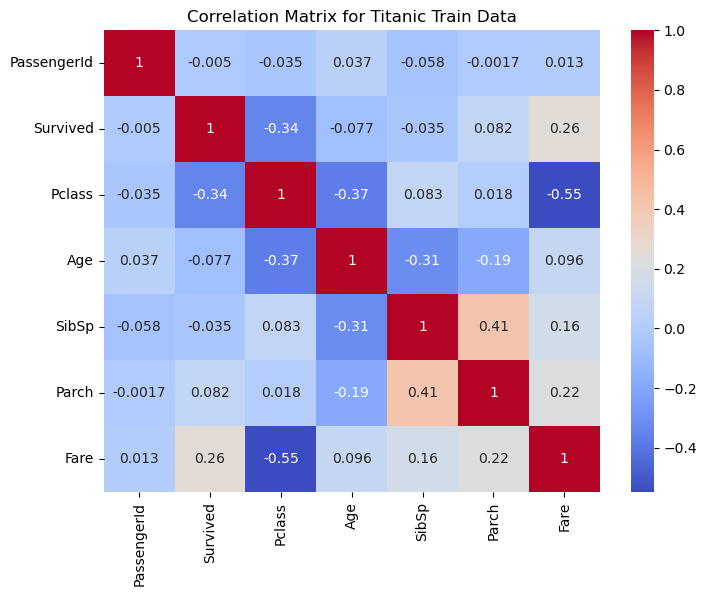

In [146]:
corr_matrix = train.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Titanic Train Data')
plt.show()

## Treinando o modelo de LogisticRegression

In [147]:
# remover os NaN de 'Age'
train.dropna(subset=['Age'], inplace=True)
test.dropna(subset=['Age'], inplace=True) 

# Codificando 'Sex': female = 0, male = 1
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})


X_train = train[['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]] 
y_train = train['Survived']

X_test = test[['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]]
y_test = test['Survived']


# Inclui o intercepto (constante)
X_train_sm = sm.add_constant(X_train)

# Ajusta o modelo de regressão logística
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Exibe o resumo estatístico
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.445814
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.3400
Time:                        20:03:19   Log-Likelihood:                -318.31
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.003e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6197      0.547     10.279      0.000       4.548       6.691
Sex           -2.6374      0.


| Variável | Coeficiente | Explicação |
|----------|-------------|------------|
| const    | 5.6197      | Intercepto do modelo; representa o logit da probabilidade de sobrevivência quando todas as variáveis explicativas são zero. |
| Sex      | -2.6374     | Ser do sexo masculino (1) diminui a chance de sobrevivência em relação ao feminino (0): log-odds de sobrevivência 2.6374 unidades menor do que mulheres, ceteris paribus. |
| Pclass   | -1.3160     | Quanto maior valor de Pclass (classe mais baixa), menor a chance de sobrevivência. |
| Age      | -0.0445     | A cada aumento de 1 ano na idade, a chance de sobrevivência diminui levemente (0.0445). |
| SibSp    | -0.3646     | A cada aumento de 1 irmãos/cônjuges a bordo, a chance de sobrevivência reduz em 0.3646. |
| Parch    | -0.0371     | Ter mais pais/filhos a bordo reduz levemente a chance de sobrevivência. |

---

A tabela abaixo resume os coeficientes estimados e seus respectivos valores-p:

| Variável | Coeficiente | p-valor  | Significância? | Interpretação do Impacto |
|----------|-------------|----------|----------------|-------------------------|
| Sex      | -2.6374     | 0.000    | Sim            | Forte impacto: ser homem reduz significativamente a chance de sobrevivência. |
| Pclass   | -1.3160     | 0.000    | Sim            | Forte impacto: passageiros de classes mais baixas têm menor chance de sobreviver. |
| Age      | -0.0445     | 0.000    | Sim            | Idade maior reduz levemente a chance de sobrevivência. |
| SibSp    | -0.3646     | 0.004    | Sim            | Ter mais irmãos/cônjuges a bordo reduz a chance de sobrevivência. |
| Parch    | -0.0371     | 0.756    | Não            | Sem impacto estatisticamente significativo. |

*Discussão:*
As variáveis `Sex`, `Pclass`, `Age` e `SibSp` possuem p-valores menores que 0.05, indicando que são estatisticamente significativas para a predição da sobrevivência. Entre elas, `Sex` e `Pclass` apresentam os maiores coeficientes em módulo, mostrando maior impacto na chance de sobrevivência. A variável `Parch` não é significativa (p-valor alto), sugerindo pouco ou nenhum efeito na predição do modelo.

---

In [148]:
# Calcular a probabilidade estimada de sobrevivência para um passageiro do
# sexo feminino, 25 anos, na 1ª classe, viajando sozinho.


# ['Sex', 'Pclass', 'Age', 'SibSp', "Parch"]
const = 1.0

x_new = pd.DataFrame([[const, 0, 1, 25, 0, 0]], columns=X_train_sm.columns)
pred = logit_model.predict(x_new)
print(f"Probabilidade estimada de sobrevivência: {pred.iloc[0]:.4f}")


Probabilidade estimada de sobrevivência: 0.9605


In [149]:

# Inclui o intercepto (constante)
X_test_sm = sm.add_constant(X_test)

y_pred_proba = logit_model.predict(X_test_sm)

threshold = 0.5
y_pred = [1 if i > threshold else 0 for i in y_pred_proba]

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       205
           1       0.88      0.91      0.89       127

    accuracy                           0.92       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.92      0.92      0.92       332



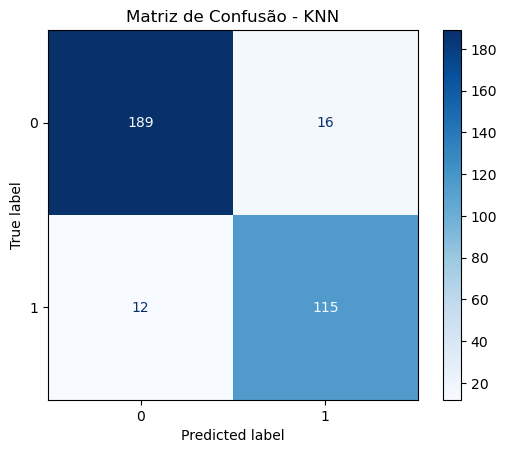

In [150]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')


# Avaliação
print(classification_report(y_test, y_pred))

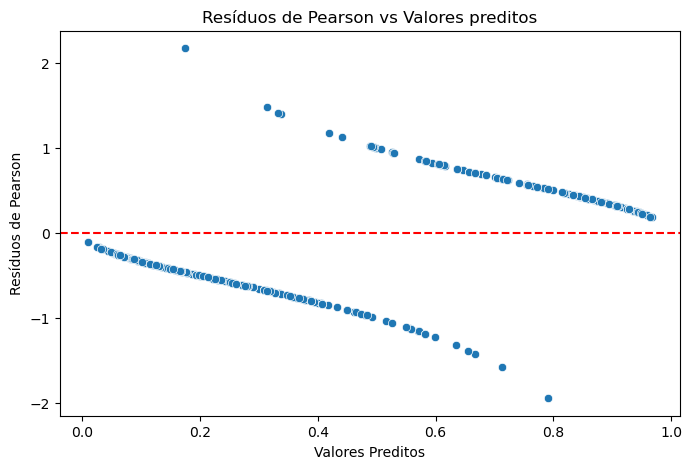

In [151]:
y_pred_proba = np.array(y_pred_proba)

# Resíduos de Pearson
# resid_pearson = logit_model.resid_pearson
resid_pearson = (y_test - (y_pred_proba)) / np.sqrt(y_pred_proba * (1 - y_pred_proba))

# 1. Resíduos vs Valores ajustados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_proba, y=resid_pearson)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos de Pearson')
plt.title('Resíduos de Pearson vs Valores preditos')
plt.show()

Os resíduos são maiores (em módulo) quando as probabilidades previstas estão próximas de 0.2 ou 0.8. Não indica, por si só, um problema no ajuste, mas exige cautela ao interpretar pontos extremos.

Os resíduos parecem razoavelmente simétricos em torno da linha horizontal vermelha ($r = 0$), o que é desejável.
Isso sugere que o modelo não está sistematicamente superestimando ou subestimando.

Existem pontos influentes ou outliers que se destacam por estarem próximos de -2 ou +2, porém isso é esperado e não compromete o modelo como um todo. 


---

# (2) GLMs - Regressão de Poisson

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para
modelar variáveis resposta com distribuições da família exponencial. Nesta tarefa,
você irá explorar um caso em que a variável resposta é de contagem, ajustando
modelos alternativos e avaliando a qualidade do ajuste.

Dados
Utilize o seguinte conjunto de dados:
- Dataset: Bike Sharing Dataset (UCI)
- Descrição: Dados sobre o aluguel de bicicletas em Washington D.C., com
variáveis como temperatura, umidade, dia da semana, feriados, entre outros.
A variável de interesse ‘cnt‘ representa o número total de bicicletas
alugadas por dia.

Tarefas
1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘
com base em pelo menos três variáveis explicativas de sua escolha.
2. Avaliar a presença de overdispersion comparando a deviance ao número de
graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.
3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto
das variáveis selecionadas.
4. Construir um gráfico de resíduos de deviance vs. valores previstos e
avaliar se há padrões sistemáticos.
5. Comparar o modelo final com um modelo de regressão linear simples (OLS)
ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais
adequado neste caso.

In [152]:
import pandas as pd

day = pd.read_csv('data/day.csv', index_col=0)
hour = pd.read_csv('data/hour.csv', index_col=0)

In [153]:
print(day.shape)
print(day.columns)

(731, 15)
Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


| **Variável** |**Explicação**|
| ------------ |------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `instant`    | Índice do registro (identificador sequencial)                                                                                                          |
| `dteday`     | Data do registro                                                                                                                                       |
| `season`     | Estação do ano (1: primavera, 2: verão, 3: outono, 4: inverno)                                                                                         |
| `yr`         | Ano (0: 2011, 1: 2012)                                                                                                                                 |
| `mnth`       | Mês (1 a 12)                                                                                                                                           |
| `holiday`    | Indica se o dia é feriado (1: sim, 0: não)                                                                                                             |
| `weekday`    | Dia da semana (0: domingo, ..., 6: sábado)                                                                                                             |
| `workingday` | Indica se é um dia útil (1: sim, 0: não — ou seja, nem fim de semana nem feriado)                                                                      |
| `weathersit` | Situação do clima:<br>1: Céu limpo, poucas nuvens<br>2: Névoa, nublado<br>3: Chuva leve, neve leve, trovoadas<br>4: Chuva forte, neve intensa, neblina |
| `temp`       | Temperatura normalizada (valores reais divididos por 41 °C)                                                                                            |
| `atemp`      | Sensação térmica normalizada (valores reais divididos por 50 °C)                                                                                       |
| `hum`        | Umidade relativa normalizada (valores reais divididos por 100)                                                                                         |
| `windspeed`  | Velocidade do vento normalizada (valores reais divididos por 67)                                                                                       |
| `casual`     | Número de usuários casuais (não registrados)                                                                                                           |
| `registered` | Número de usuários registrados                                                                                                                         |
| `cnt`        | Contagem total de bicicletas alugadas (`casual` + `registered`)                                                                                        |


*Escolha de variáveis para o GLM:*

- mnth: O mês do ano pode indicar os momentos de pico de demanda sazonais (ex: ferias escolares).

- temp:	A temperatura afeta o conforto de pedalar; temperaturas muito baixas ou muito altas podem reduzir o uso.

- weekday: Pode capturar variações semanais mesmo dentro de dias úteis (ex: segundas vs sextas).

- holiday: Dias feriados podem influenciar o aumento da demanda de bicicletas.

- weathersit: (variável de clima mais direta que season) dias com chuva/neblina devem ter menos aluguel.

- windspeed: Velocidades altas podem desincentivar o uso da bicicleta.



obs:
não colocar junto temp e atemp (sensação térmica) pois são altamente correlacionados.

In [154]:
from sklearn.model_selection import train_test_split

X = day[['mnth', 'temp', 'weekday', 'holiday', 'weathersit', 'windspeed']]
y = day['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [155]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (511, 6)
X_test shape: (220, 6)
y_train shape: (511,)
y_test shape: (220,)


In [156]:
import statsmodels.api as sm
import numpy as np

# Ajuste do modelo de Poisson

X_train_sm = sm.add_constant(X_train)


poisson_model = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  511
Model:                            GLM   Df Residuals:                      504
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2669e+05
Date:                Wed, 09 Jul 2025   Deviance:                   2.4819e+05
Time:                        20:10:13   Pearson chi2:                 2.39e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8761      0.004   1990.154      0.0

### Verificação de Overdispersion e tratamento

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Avaliar a presença de overdispersion comparando a deviance ao número de graus de liberdade.

residuos = poisson_model.deviance
print(f'Residual Deviance: {residuos:.4f}')

gl_resid = poisson_model.df_resid
print(f'Residual DL: {gl_resid}')

print(f'Razão deviance/GL = {(residuos/gl_resid):.4f}')

# Residual deviance é maior que residual degrees of freedom (overdispersion)

Residual Deviance: 248191.1777
Residual DL: 504
Razão deviance/GL = 492.4428


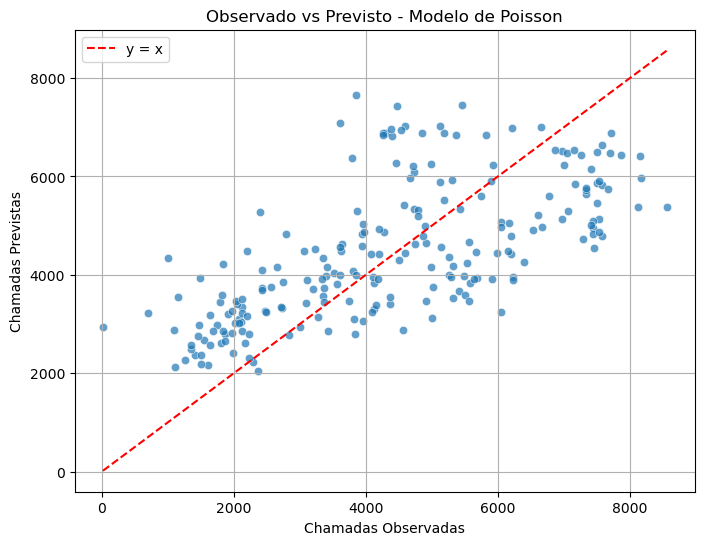

In [158]:
# Podemos, ainda, comparar valores observados vs previstos

X_test_sm = sm.add_constant(X_test)
y_pred = poisson_model.predict(X_test_sm) # valores previstos 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7) # valores observados (y_test) vs y_pred
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="y = x")
plt.xlabel("Chamadas Observadas")
plt.ylabel("Chamadas Previstas")
plt.title("Observado vs Previsto - Modelo de Poisson")
plt.legend()
plt.grid(True)
plt.show()

In [159]:
import statsmodels.api as sm


# Como notamos um grau elevado de overdispersion dos dados preditos, vamos ajustar um modelo quasi-poisson
quasi_model = sm.GLM(y_train, X_train_sm, family=sm.families.NegativeBinomial()).fit()
print(quasi_model.summary())

# O Poisson supõe que a média e a variância são iguais.

# NegativeBinomial flexibiliza a suposição de Poisson:
# Ele permite que a variância seja maior que a média,
# sendo uma boa escolha quando há overdispersion


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  511
Model:                            GLM   Df Residuals:                      504
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4788.0
Date:                Wed, 09 Jul 2025   Deviance:                       70.533
Time:                        20:12:03   Pearson chi2:                     61.4
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1035
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7647      0.244     31.844      0.0

c:\Users\parai\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [162]:
# Avaliar a presença de overdispersion comparando a deviance 
# ao número de graus de liberdade.

residuos = quasi_model.deviance
print(f'Residual Deviance: {residuos:.4f}')

gl_resid = quasi_model.df_resid
print(f'Residual DL: {gl_resid}')

print(f'Razão deviance/GL = {(residuos/gl_resid):.4f}')

# Residual deviance é menor que residual degrees of freedom

Residual Deviance: 70.5332
Residual DL: 504
Razão deviance/GL = 0.1399


### Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto das variáveis selecionadas.

1. mnth (coef = 0.0282, p = 0.037)
    - Sinal: Positivo → Aumentos no valor da variável mnth (mês do ano) estão associados a um aumento na variável dependente.

    - Significância: p = 0.037 < 0.05 → Significativo.

    - Interpretação: Cada mês adicional está associado, em média, a um aumento de 0.0282 unidades na variável resposta, mantidas as demais variáveis constantes. Isso sugere uma leve tendência de crescimento ao longo do ano.

2. temp (coef = 1.5767, p = 0.000)
    - Sinal: Positivo → Quanto maior a temperatura, maior o valor esperado da variável resposta.

    - Significância: p < 0.001 → Altamente significativo.

    - Interpretação: Para cada aumento unitário na temperatura, espera-se um aumento de 1.5767 unidades na variável resposta. A temperatura é, portanto, um fator fortemente associado ao aumento da variável dependente.

3. weekday (coef = 0.0147, p = 0.498)
    - Sinal: Levemente positivo.

    - Significância: p = 0.498 > 0.05 → Não significativo.

    - Interpretação: Não há evidência estatística de que os dias da semana tenham impacto relevante sobre a variável resposta neste modelo.

4. holiday (coef = -0.1701, p = 0.534)
    - Sinal: Negativo → Sugere que feriados reduzem a variável resposta.

    - Significância: p = 0.534 > 0.05 → Não significativo.

    - Interpretação: A associação entre feriados e a variável dependente não é estatisticamente significativa. Ainda assim, o sinal negativo sugere uma tendência à queda.

5. weathersit (coef = -0.2064, p = 0.012)
    - Sinal: Negativo → Piores condições climáticas reduzem a variável resposta.

    - Significância: p = 0.012 < 0.05 → Significativo.

    - Interpretação: Cada aumento na severidade do clima reduz a variável resposta em média em 0.2064 unidades. Isso mostra que o clima tem impacto negativo e estatisticamente significativo.

6. windspeed (coef = -0.6233, p = 0.303)
    - Sinal: Negativo → Ventos mais fortes tendem a reduzir a variável resposta.

    - Significância: p = 0.303 > 0.05 → Não significativo.

    - Interpretação: Apesar do coeficiente relativamente alto (em valor absoluto), não há evidência estatística de que a velocidade do vento afete a variável resposta com significância neste modelo.


### Construir um gráfico de resíduos de deviance vs. valores previstos e avaliar se há padrões sistemáticos.

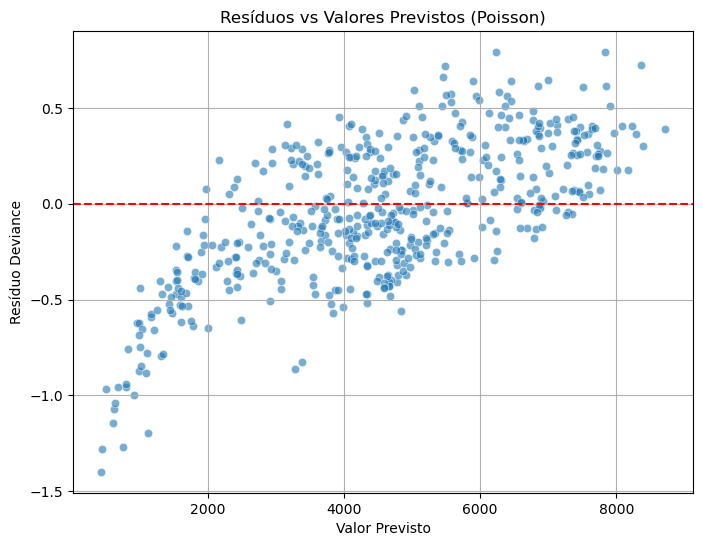

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Resíduos deviance
residuos = quasi_model.resid_deviance

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=residuos, alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Valor Previsto")
plt.ylabel("Resíduo Deviance")
plt.title("Resíduos vs Valores Previstos (Poisson)")
plt.grid(True)
plt.show()

**O que o gráfico representa:**

Eixo X: valores previstos durante treinamento, ou seja, o cnt de aluguel de bicicletas.

Eixo Y: resíduos de deviance — medem a discrepância entre os valores observados e os previstos, com interpretação similar à dos resíduos padronizados.

Linha vermelha tracejada: referência para $resíduo = 0$. Resíduos positivos indicam subestimação, negativos indicam superestimação.

**Padrões no gráfico:**

Podemos observar um leve padrão sistemático de crescimento do deviance conforme o Valor Previsto aumenta, o que sugere que a função de ligação logarítmica pode não ser adequada.

Além disso, observa-se que, para valores previstos mais próximos de 0, os resíduos se aproximam de -1.5, o que pode indicar observações influentes ou mal ajustadas (possíveis outliers).

---


### Comparar o modelo final com um modelo de regressão linear simples (OLS) ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais adequado neste caso.

In [164]:
import statsmodels.api as sm


X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     79.40
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.16e-69
Time:                        20:15:51   Log-Likelihood:                -4415.0
No. Observations:                 511   AIC:                             8844.
Df Residuals:                     504   BIC:                             8874.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2459.7664    335.757      7.326      0.0

Coeficientes e STD errors bem altos.

1. A regressão linear clássica (OLS) faz as seguintes suposições:

    - A variável resposta (y) é contínua.
    - Os resíduos são normalmente distribuídos com variância constante (homocedasticidade).
    - Pode prever valores negativos, o que não faz sentido para contagens como número de bicicletas.

    **Problemas ao usar OLS com variáveis de contagem:**

    - Previsões podem ser negativas.
    - A variância não é constante: em contagens, a variância cresce com a média.
    - Violação das suposições estatísticas gera inferência incorreta (como p-valores e ICs pouco confiáveis).
    - Erros de predição tendem a ser maiores, especialmente em contagens baixas ou altas.


2. O GLM de Poisson é especificamente desenhado para variáveis de contagem. Suas principais características:

    - Usa uma função de ligação logarítmica, o que garante que $\lambda$ (a média esperada) será sempre positiva.
    - A variância é modelada como proporcional à média, refletindo o comportamento típico de dados de contagem.
    - Não prevê valores negativos.
    - Produz estimativas mais interpretáveis em termos de razões de taxas (ex: "um aumento de 1°C na temperatura aumenta o número esperado de aluguéis em X%").


# (3) Pareamento por Escore de Propensão

Nesta parte, você irá aplicar o método de Pareamento por Escore de Propensão (PSM) para estimar o efeito da presença de diabetes (diabetes) sobre os gastos médicos totais de indivíduos, com base em dados observacionais.

**Dados**

O conjunto de dados utilizado nesta atividade é uma amostra simulada de registros individuais inspirados no painel de despesas médicas conhecido como Medical Expenditure Panel Survey (MEPS). Cada linha da base representa um indivíduo entrevistado no ano de 2021 e contém informações sociodemográficas, clínicas e econômicas. As variáveis disponíveis são descritas abaixo:

- **dupersid**: identificador único do indivíduo na amostra.
- **age**: idade do indivíduo (em anos).
- **sex**: sexo biológico (1 = masculino, 2 = feminino).
- **race**: raça declarada do indivíduo (ex.: White).
- **poverty**: nível de renda familiar classificado em categorias (ex.: Low Income, Near Poor, Middle Income).
- **diabetes**: variável indicadora de presença de diabetes (1 = com diagnóstico, 0 = sem diagnóstico).
- **marital_status**: estado civil do indivíduo (ex.: Married, Never Married, Divorced, Widowed).
- **totexp**: valor total de despesas com saúde no ano (em dólares).
- **ertexp**: valor das despesas com atendimentos de emergência (em dólares).
- **year**: ano da coleta dos dados (todos os registros são de 2021).


O conjunto de dados a ser usado está no arquivo hc2021_dados.csv.

## Análise Exploratória
• Apresente uma análise descritiva das covariáveis (age, sex, race,
poverty, marital_status).

• Compare os grupos com e sem diabetes em termos dessas características
e do desfecho (totexp).

In [165]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/hc2021_dados.csv')

In [166]:
df.head()

,dupersid,age,sex,race,poverty,diabetes,marital_status,totexp,ertexp,year
0,2320005101,74,2,White,Low Income,0,Married,4908,0,2021
1,2320005102,85,1,White,Low Income,0,Married,21257,0,2021
2,2320006101,48,2,White,Near Poor,0,Divorced,827,0,2021
3,2320006102,23,1,White,Near Poor,0,Never Married,0,0,2021
4,2320006103,22,1,White,Near Poor,0,Never Married,0,0,2021


In [167]:
# variáveis de interesse
cols = ['age', 'sex', 'race', 'poverty', 'marital_status']
df_subset = df[cols]

# 1. Análise descritiva 'AGE'
print("\n==== Variável contínua: age ====")
print(df['age'].describe())



==== Variável contínua: age ====
count    22446.000000
mean        51.379756
std         18.646288
min         18.000000
25%         36.000000
50%         52.000000
75%         67.000000
max         85.000000
Name: age, dtype: float64


In [168]:
# Análise das variáveis categóricas
categorical_vars = ['sex', 'race', 'poverty', 'marital_status']


for var in categorical_vars:
    print(f"\n========  {var} ========")
    
    freq_table = df[var].value_counts(dropna=False).reset_index() # reset_index() to convert the frequency Series into a DataFrame.
    freq_table.columns = [var, 'Frequência']
    freq_table['Percentual (%)'] = (freq_table['Frequência'] / len(df)) * 100

    print(freq_table.to_string(index=False))


========  sex ========
 sex  Frequência  Percentual (%)
   2       12072       53.782411
   1       10374       46.217589

========  race ========
    race  Frequência  Percentual (%)
   White       17025       75.848704
   Black        3327       14.822240
   Asian        1261        5.617927
Multiple         636        2.833467
   AI/AN         197        0.877662

========  poverty ========
      poverty  Frequência  Percentual (%)
  High Income        8521       37.962220
Middle Income        6278       27.969349
         Poor        3561       15.864742
   Low Income        2980       13.276308
    Near Poor        1106        4.927381

========  marital_status ========
marital_status  Frequência  Percentual (%)
       Married       10390       46.288871
 Never Married        6316       28.138644
      Divorced        3216       14.327720
       Widowed        1986        8.847902
     Separated         538        2.396864


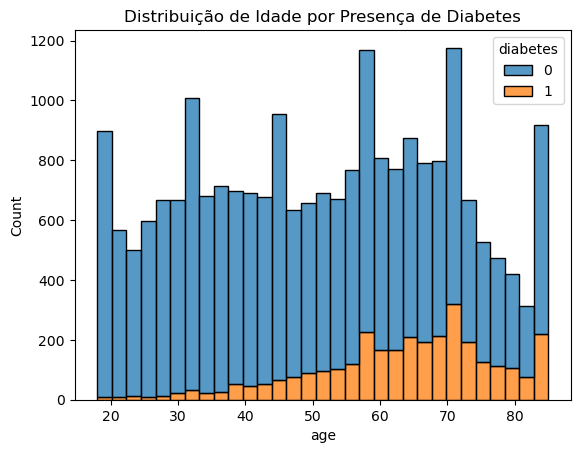

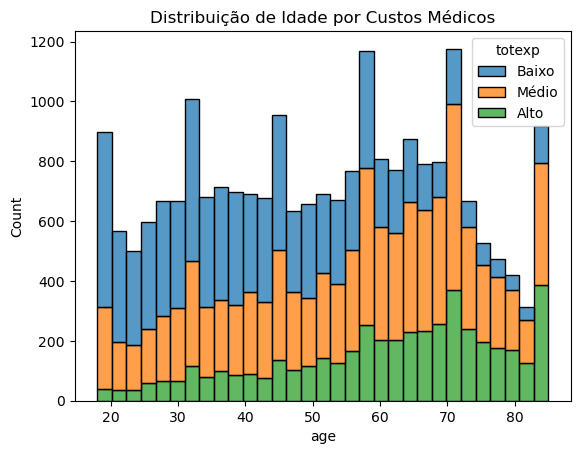

In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# categorias únicas de age, sex, race, poverty, marital_status
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack')
plt.title('Distribuição de Idade por Presença de Diabetes')
plt.show()


# Usando bins de gastos para usar para os gastos médicos
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df, x='age', hue=totexp_bins, multiple='stack')
plt.title('Distribuição de Idade por Custos Médicos')
plt.show()

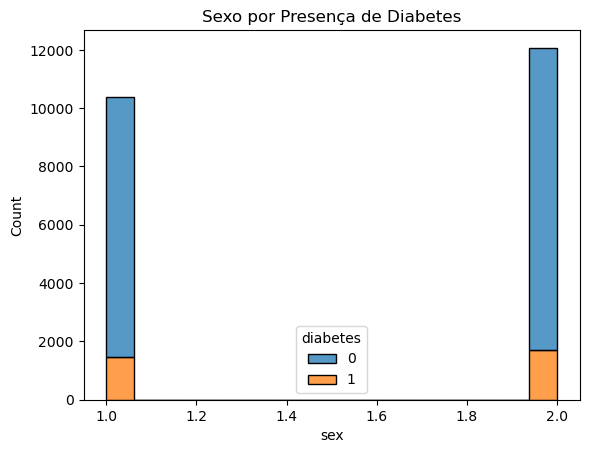

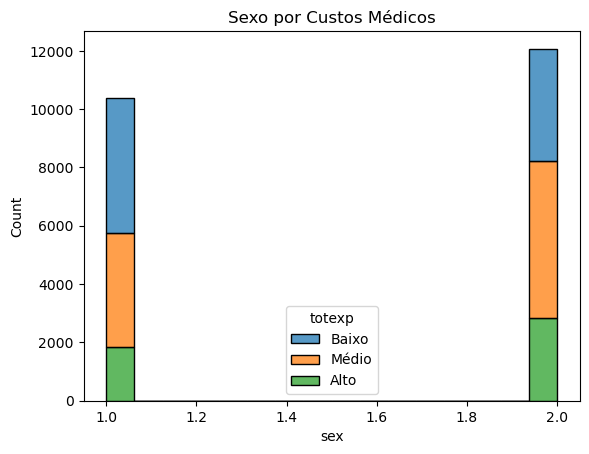

In [170]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# categorias únicas de age, sex, race, poverty, marital_status
sns.histplot(data=df, x='sex', hue='diabetes', multiple='stack')
plt.title('Sexo por Presença de Diabetes')
plt.show()


# Usando bins de gastos para usar para os gastos médicos
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df, x='sex', hue=totexp_bins, multiple='stack')
plt.title('Sexo por Custos Médicos')
plt.show()

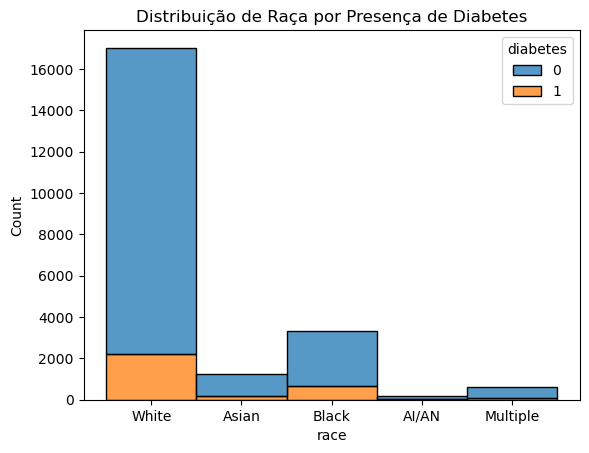

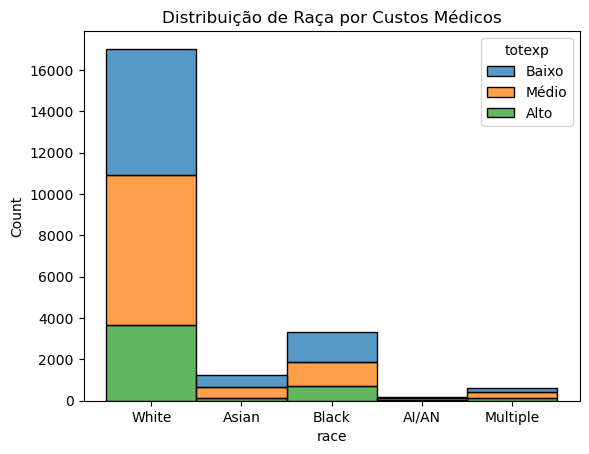

In [171]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# categorias únicas de age, sex, race, poverty, marital_status
sns.histplot(data=df, x='race', hue='diabetes', multiple='stack')
plt.title('Distribuição de Raça por Presença de Diabetes')
plt.show()


# Usando bins de gastos para usar para os gastos médicos
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df, x='race', hue=totexp_bins, multiple='stack')
plt.title('Distribuição de Raça por Custos Médicos')
plt.show()

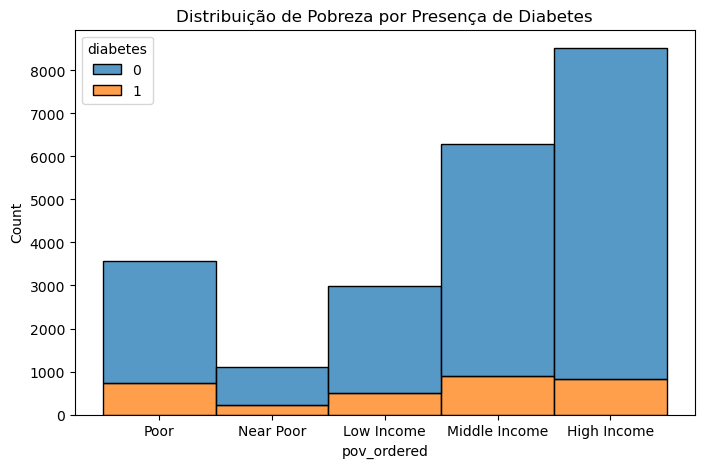

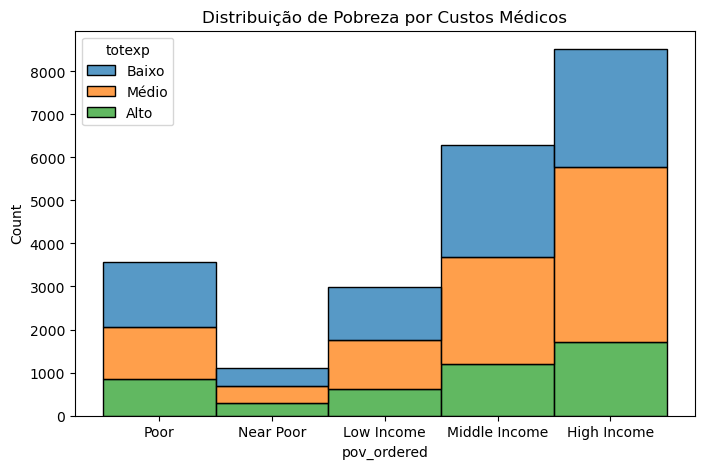

In [172]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

order_poverty = ['Poor', 'Near Poor', 'Low Income', 'Middle Income', 'High Income']
df_poverty = df[['poverty', 'diabetes', 'totexp']].copy()
df_poverty['pov_ordered'] = pd.Categorical(df_poverty['poverty'], categories=order_poverty, ordered=True)

# categorias únicas de age, sex, race, poverty, marital_status
plt.figure(figsize=(8,5))
sns.histplot(data=df_poverty, x='pov_ordered', hue='diabetes', multiple='stack')
plt.title('Distribuição de Pobreza por Presença de Diabetes')
plt.show()


# Usando bins de gastos para usar para os gastos médicos
plt.figure(figsize=(8,5))
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df_poverty, x='pov_ordered', hue=totexp_bins, multiple='stack')
plt.title('Distribuição de Pobreza por Custos Médicos')
plt.show()

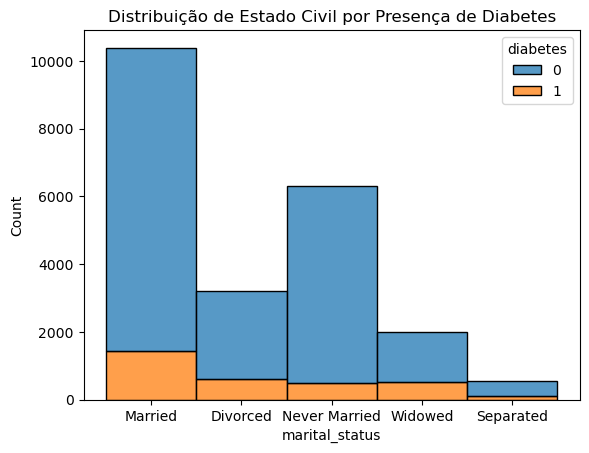

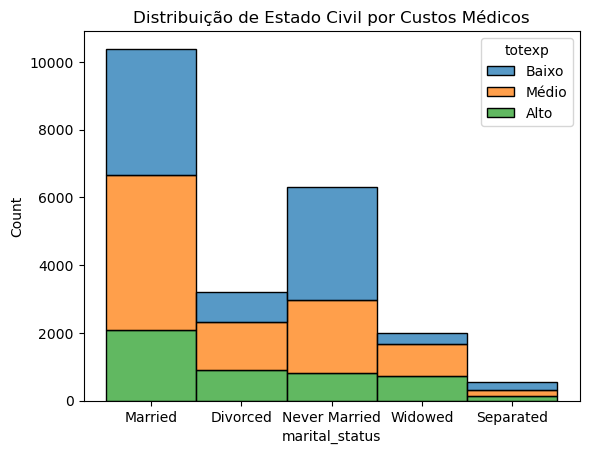

In [173]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# categorias únicas de age, sex, race, poverty, marital_status
sns.histplot(data=df, x='marital_status', hue='diabetes', multiple='stack')
plt.title('Distribuição de Estado Civil por Presença de Diabetes')
plt.show()


# Usando bins de gastos para usar para os gastos médicos
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df, x='marital_status', hue=totexp_bins, multiple='stack')
plt.title('Distribuição de Estado Civil por Custos Médicos')
plt.show()

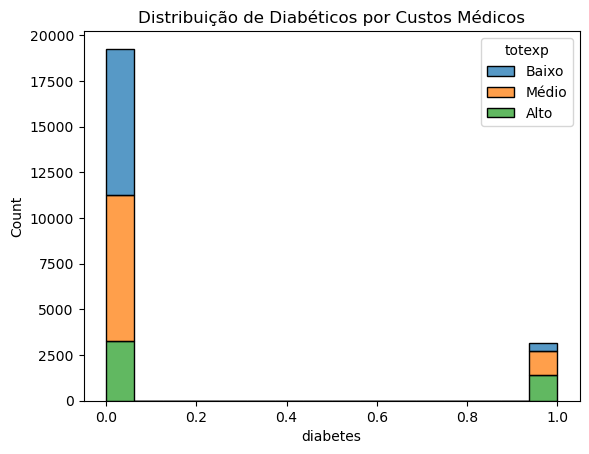

In [174]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Usando bins de gastos para usar para os gastos médicos
totexp_bins = pd.cut(df['totexp'], bins=[-1, 1000, 10000, np.inf], labels=['Baixo', 'Médio', 'Alto'])
sns.histplot(data=df, x='diabetes', hue=totexp_bins, multiple='stack')
plt.title('Distribuição de Diabéticos por Custos Médicos')
plt.show()

## Estimativa do Escore de Propensão


• Modele a probabilidade de ter diabetes usando uma regressão logística
com as covariáveis explicativas apropriadas.


• Apresente os coeficientes estimados e discuta os fatores mais associados
à presença de diabetes.

In [175]:
# Codificando variáveis categóricas

df_X = df.copy()

df_X = pd.get_dummies(df_X, columns=['poverty', 'marital_status', 'race'], drop_first=True, dtype=int)

df_X.head()

,dupersid,age,sex,diabetes,totexp,ertexp,year,poverty_Low Income,poverty_Middle Income,poverty_Near Poor,poverty_Poor,marital_status_Married,marital_status_Never Married,marital_status_Separated,marital_status_Widowed,race_Asian,race_Black,race_Multiple,race_White
0,2320005101,74,2,0,4908,0,2021,1,0,0,0,1,0,0,0,0,0,0,1
1,2320005102,85,1,0,21257,0,2021,1,0,0,0,1,0,0,0,0,0,0,1
2,2320006101,48,2,0,827,0,2021,0,0,1,0,0,0,0,0,0,0,0,1
3,2320006102,23,1,0,0,0,2021,0,0,1,0,0,1,0,0,0,0,0,1
4,2320006103,22,1,0,0,0,2021,0,0,1,0,0,1,0,0,0,0,0,1


In [176]:
import statsmodels.api as sm

y = df['diabetes']
df_X.drop(columns=['dupersid', 'diabetes'], inplace=True)


# Inclui o intercepto (constante)
X_sm = sm.add_constant(df_X)

# Ajusta o modelo de regressão logística
logit_model = sm.Logit(y, X_sm).fit()

# Exibe o resumo estatístico
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.360305
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                22446
Model:                          Logit   Df Residuals:                    22429
Method:                           MLE   Df Model:                           16
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.1176
Time:                        20:23:36   Log-Likelihood:                -8087.4
converged:                       True   LL-Null:                       -9164.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0444      0.001     30.451      0.000

**Variáveis**

| Variável   | Coeficiente | Interpretação                                                                                                  |
|------------|-------------|----------------------------------------------------------------------------------------------------------------|
| age        | +0.0444     | Cada ano a mais de idade aumenta significativamente a chance de diabetes. (p < 0.0001)                          |
| totexp     | +6.24e-06   | Aumento no gasto total com saúde está associado a maior chance de diabetes. O efeito é pequeno, mas relevante (p < 0.0001). |
| year       | −0.0018     | Pequeno efeito negativo ao longo do tempo. Leve queda na incidência de diabetes (p < 0.0001).                |
| ertexp     | +1.298e-05 | Gasto em emergência não tem associação significativa com diabetes (p=0.293).                                             |



**Sex**

| Variável   | Coeficiente | Interpretação                                                                                                   |
|------------|-------------|-----------------------------------------------------------------------------------------------------------------|
| sex        | -0.1452     | Sexo masculino (1 = masculino, 2 = feminino) está associado a menor chance de diabetes (p < 0.001).             |

**Poverty**

| Categoria      | Coef.  | Interpretação                                                        |
|----------------|--------|-----------------------------------------------------------------------|
| Poor           | +0.8525| Pessoas pobres têm muito mais chance de ter diabetes (p < 0.001).     |
| Near Poor      | +0.7003| Também significativamente associada (p < 0.001).                      |
| Low Income     | +0.5712| Também significativamente associada (p < 0.001).                                                           |
| Middle Income  | +0.4476| Também significativamente associada (p < 0.001).                                                  |

Conclusão: Quanto menor a renda, maior a probabilidade de diabetes.

**Marital Status**
| Categoria       | Coef.   | Interpretação                                                                 |
|-----------------|---------|------------------------------------------------------------------------------|
| Married         | −0.0010 | Sem efeito significativo (p = 0.986).                                        |
| Never Married   | −0.2054 | Menor chance de diabetes comparado a divorciados (p = 0.005).                |
| Separated       | +0.3421 | Maior chance de diabetes (p = 0.004).                                        |
| Widowed         | −0.1365 | Não significativo sob $\alpha = 0.05$ (p = 0.06).                                 |

**Race**

| Categoria | Coeficiente | Interpretação                                                                 |
|-----------|-------------|-------------------------------------------------------------------------------|
| White     | −0.9363     | Menor chance de diabetes (p < 0.001).                                        |
| Asian     | −0.6108     | Também significativamente menor (p = 0.002).                                 |
| Black     | −0.4572     | Também significativamente menor (p = 0.012).                                 |
| Multiple  | −0.3888     | Não significativo sob $\alpha = 0.05$ (p = 0.065).                                 |

## Pareamento 1:1 por escore de propensão

• Realize o pareamento 1:1 sem reposição com base no escore estimado.

• Avalie o balanceamento das covariáveis antes e depois do pareamento.

In [177]:
# Transformar variáveis categóricas em dummies
df = pd.get_dummies(df, columns=['race', 'poverty', 'marital_status'], drop_first=True, dtype=int)

X = df.drop(columns=['diabetes', 'totexp', 'ertexp', 'dupersid'])

# Variável dependente
y = df['diabetes']

In [178]:
from sklearn.linear_model import LogisticRegression

# Estimar o escore de propensão
model = LogisticRegression(max_iter=1000)
df['propensity_score'] = model.fit(X, y).predict_proba(X)[:, 1]

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
treated = df[df['diabetes'] == 1]
control = df[df['diabetes'] == 0]

In [181]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])

distances, indices = nn.kneighbors(treated[['propensity_score']])

# matched_control é uma parte de control selecionada a partir de indices
matched_control = control.iloc[indices.flatten()].copy() 
matched_control.index = treated.index # para alinhamento
matched_data = pd.concat([treated, matched_control])

In [182]:
att_naive = treated['totexp'].mean() - control['totexp'].mean()
att_matched = matched_data.groupby('diabetes')['totexp'].mean().diff().iloc[-1] # media por grupo após pareamento

print(f"ATT sem pareamento: {att_naive:.2f}")
print(f"ATT com pareamento: {att_matched:.2f}")

ATT sem pareamento: 9057.84
ATT com pareamento: 5948.88


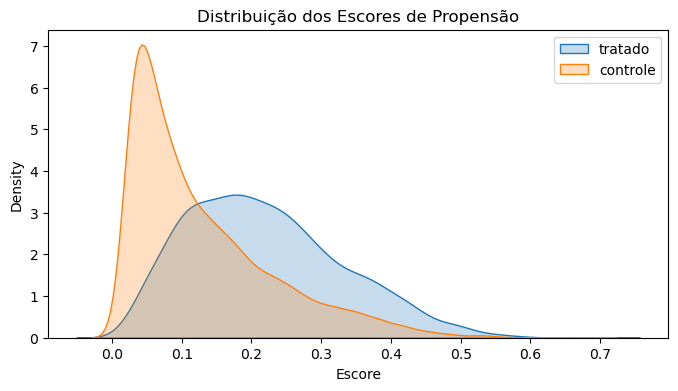

In [183]:
import seaborn as sns
import matplotlib . pyplot as plt


plt.figure( figsize =(8,4))
sns.kdeplot(data=df[df['diabetes'] == 1]['propensity_score'] , label='tratado', fill=True)
sns.kdeplot(data=df[df['diabetes'] == 0]['propensity_score'] , label='controle', fill=True)
plt.title('Distribuição dos Escores de Propensão')
plt.xlabel('Escore')
plt.legend()
plt.show()


*Observações:*

Observa-se que há sobreposição entre os escores de propensão dos grupos tratado e controle,
o que é um bom sinal para o pareamento, indicando que existem indivíduos comparáveis nos dois grupos.

A distribuição do grupo 'controle' é assimétrica, com uma concentração de escores 
muito baixos (entre 0.0 e 0.1). Isso sugere que muitos indivíduos sem diabetes têm características que sugerem baixa probabilidade de ter diabetes. Isso, no entanto, pode dificultar o pareamento adequado para indivíduos com escores de propensão mais altos.
Já os tratados estão mais distribuídos ao longo do eixo, porém com média < 0.5.



A diferença média de totexp (despesas médicas) após o pareamento é de 5948.88. Esse valor pode ser
 interpretado como uma estimativa do efeito médio do tratamento sobre os tratados
 (ATT) sob as hipóteses do modelo de escore de propensão.


In [184]:
import numpy as np

# Número de simulações
n_bootstrap = 1000

# Lista para armazenar as estimativas de ATT
att_bootstrap = []

# Bootstrap: reamostrar os pares tratados-controle
for _ in range(n_bootstrap):
    
    # Reamostrar índices com reposição
    sample_indices = np.random.choice(treated.index, size=len(treated), replace=True)
    
    # Selecionar amostras reamostradas
    treated_sample = treated.loc[sample_indices]
    control_sample = matched_control.loc[sample_indices]
    
    # Calcular ATT (diferença das médias entre treated e matched_control) da amostra bootstrap
    att_sample = treated_sample['totexp'].mean() - control_sample['totexp'].mean()
    att_bootstrap.append(att_sample)

# Calcular intervalo de confiança 95%
lower_bound = np.percentile(att_bootstrap, 2.5)
upper_bound = np.percentile(att_bootstrap, 97.5)

print(f"Intervalo de confiança 95% para o ATT (bootstrap): (${lower_bound:.2f}, ${upper_bound:.2f})")


Intervalo de confiança 95% para o ATT (bootstrap): ($4710.51, $7201.13)


## Discussão

- Comente sobre a qualidade do pareamento e possíveis vieses remanescentes.

O pareamento parece ter melhorado consideravelmente a comparação entre os grupos tratado e controle, como evidenciado pela redução do ATT de 9057.84 para 5948.88 após o pareamento. Isso nos diz que, ao comparar indivíduos mais semelhantes (pelas suas suas covariáveis via escore de propensão), o impacto estimado da diabetes sobre os gastos médicos diminui, sugerindo que parte da diferença original era devida a confundimento observável.

No entanto, alguns vieses podem permanecer:

Como vimos no gráfico anteriormente, a distribuição assimétrica dos escores de propensão no grupo controle (com grande concentração em escores baixos entre 0.0–0.2), indica que muitos controles têm características muito diferentes dos tratados. Isso pode dificultar encontrar "bons pares" 1:1 para indivíduos tratados com escores mais altos, comprometendo o pareamento nesses casos.

- Interprete o ATT obtido: qual o impacto médio estimado da diabetes
sobre os gastos médicos?

O ATT estimado com pareamento foi de $5948.88, com intervalo de confiança de 95% entre ($4710.51, $7201.13). Isso significa que, em média, ter diabetes está associado a um aumento de aproximadamente $5948 nos gastos médicos anuais entre os indivíduos que possuem diabetes, quando comparados com indivíduos semelhantes sem a doença. 

Como o intervalo de confiança não inclui zero, essa estimativa é estatisticamente significativa, sugerindo um impacto real da condição sobre os custos médicos.

# (4) Inferência Bayesiana

Nesta parte, você irá utilizar a inferência bayesiana para estimar a proporção
de sobrevivência (θ) de passageiros, incorporando diferentes hipóteses a priori e
comparando-as com a evidência empírica observada.


**Dados**
Utilize o Titanic Dataset, disponível publicamente e já usado na parte 1.

**Tarefas**

1. **Pré-processamento dos dados**

    - Filtre apenas passageiros adultos (idade ≥ 18 anos).
    - Crie uma variável binária indicando se o passageiro sobreviveu (1) ou não (0).

2. **Modelagem a priori para θ**

    - Escolha duas distribuições Beta para θ, por exemplo:
      - Beta(1,1): não informativa (uniforme).
      - Beta(2,5): reflete a crença de que poucos adultos sobrevivem.
    - Justifique as escolhas das distribuições a priori.

3. **Cálculo da distribuição a posteriori**

    - Calcule os parâmetros da distribuição a posteriori com base nos dados observados.
    - Plote as distribuições a priori e a posteriori no mesmo gráfico.
    - Compare e interprete as distribuições resultantes.

4. **Estatísticas da posteriori**

    - Calcule a média e o intervalo de credibilidade de 95% para θ em cada cenário.
    - Interprete os resultados considerando o contexto do problema.

5. Discussão

    - Discuta como as diferentes escolhas de priori influenciaram os resultados. Em que contextos o uso da abordagem bayesiana pode ser mais adequado do que abordagens frequentistas?


`from scipy.stats import beta`
`beta.pdf(x, a_post, b_post)`

In [185]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
survived = pd.read_csv('data/gender_submission.csv')

test['Survived'] = survived['Survived']

In [186]:
df = train[train['Age'] >= 18].drop(columns='Survived')
y = train['Survived']

In [187]:
p_sobreviventes = np.sum(train['Survived'])/len(train['Survived'])
print(f'Proporcao de sobreviventes: {p_sobreviventes:.2f}')

Proporcao de sobreviventes: 0.38


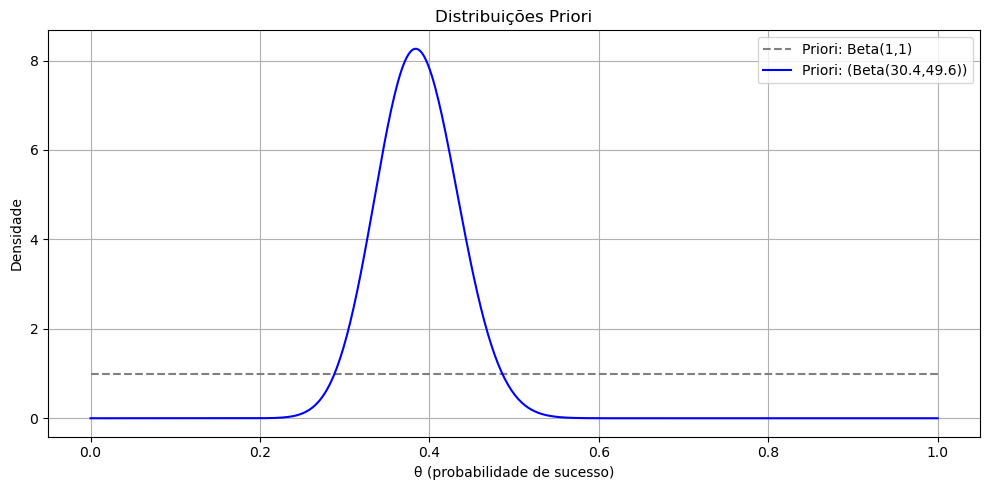

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Escolhendo as duas distribuições Beta para theta
# θ representa a probabilidade de um passageiro sobreviver
theta = np.linspace(0, 1, 500)

# Vamos escolher uma informativa e uma não-informativa.

# Beta(1, 1) - uniforme
# Essa distribuição representa total incerteza inicial sobre θ.
prior_pdf = beta.pdf(theta, 1, 1)


# Para a priori informativa, usaremos a taxa de sobrevivência dos passageiros
# Para isso, terá uma quantidade alta de observações = 100
# total de observações anteriores fictícias = α + β 
n_pseudo_observacoes = 100
alpha_inf  = p_sobreviventes * n_pseudo_observacoes
beta_inf = n_pseudo_observacoes - alpha_inf
prior_info_pdf = beta.pdf(theta, alpha_inf+1, beta_inf+1)



# Plot
plt.figure(figsize=(10, 5))
plt.plot(theta, prior_pdf, '--', label='Priori: Beta(1,1)', color='gray')
plt.plot(theta, prior_info_pdf, label='Priori: (Beta(30.4,49.6))', color='blue')

plt.title('Distribuições Priori')
plt.xlabel('θ (probabilidade de sucesso)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Prior não-informativa (Beta(1,1)): assume total ignorância sobre θ. A posteriori vai depender fortemente dos dados. É uma distribuição uniforme = 1.0 (definida pela linha tracejada cinza)

Prior informativa (Beta(30.4,49.6)): assume que θ gira em torno de 0.38, com o peso de 100 observações fictícias. A posteriori será uma combinação entre essa crença prévia e os dados reais.



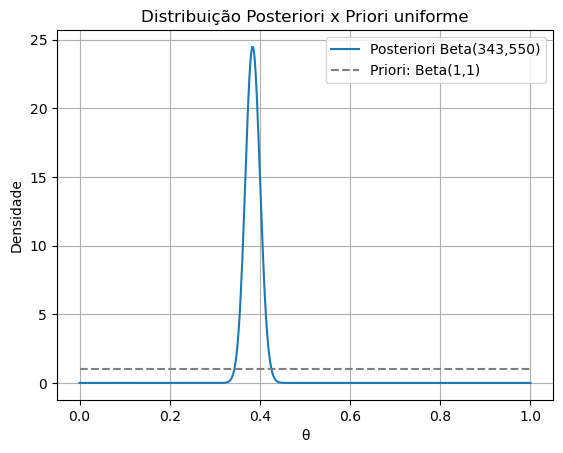

In [189]:
# Distribuição Posteriori 

n = len(train['Survived'])
x = np.sum(train['Survived'])

# Construção da posteriori com base na priori uniforme Beta(1,1)
a_prior, b_prior = 1, 1
a_post_1 = a_prior + x
b_post_1 = b_prior + n - x
posterior_1_pdf = beta.pdf(theta, a_post_1, b_post_1)


# Plotando a posteriori
theta = np.linspace(0, 1, 500)
plt.plot(theta, beta.pdf(theta, a_post_1, b_post_1), label=f'Posteriori Beta({a_post_1},{b_post_1})')
plt.plot(theta, prior_pdf, '--', label='Priori: Beta(1,1)', color='gray')
plt.title(f'Distribuição Posteriori x Priori uniforme')
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()



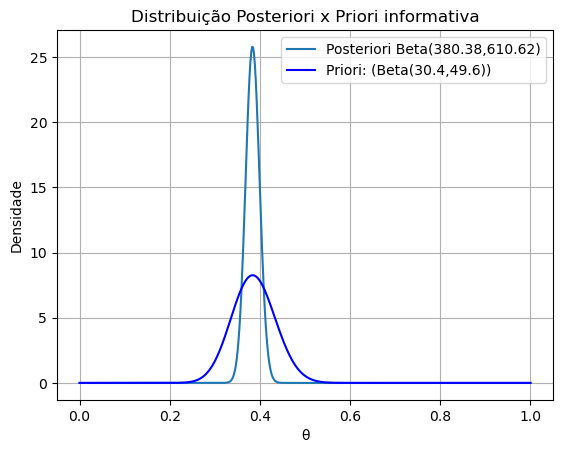

In [191]:
# Distribuição Posteriori 

n = len(train['Survived'])
x = np.sum(train['Survived'])

# Construção da posteriori com base na priori informativa
a_post_2 = alpha_inf + x
b_post_2 = beta_inf + n - x
posterior_2_pdf = beta.pdf(theta, a_post_2, b_post_2)


# Plotando a posteriori
theta = np.linspace(0, 1, 500)
plt.plot(theta, beta.pdf(theta, a_post_2, b_post_2), label=f'Posteriori Beta({a_post_2:.2f},{b_post_2:.2f})')
plt.plot(theta, prior_info_pdf, label='Priori: (Beta(30.4,49.6))', color='blue')
plt.title(f'Distribuição Posteriori x Priori informativa')
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.grid()
plt.legend()
plt.show()



In [192]:
# Estatísticas (priori 1 - uniforme)
media = a_post_1 / (a_post_1 + b_post_1)
intervalo = beta.ppf([0.025, 0.975], a_post_1, b_post_1)
print(f"Média: {media:.3f}")
print(f"Intervalo de 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")

Média: 0.384
Intervalo de 95%: (0.352, 0.416)


In [193]:
# Estatísticas (priori 1 - uniforme)
media = a_post_2 / (a_post_2 + b_post_2)
intervalo = beta.ppf([0.025, 0.975], a_post_2, b_post_2)
print(f"Média: {media:.3f}")
print(f"Intervalo de 95%: ({intervalo[0]:.3f}, {intervalo[1]:.3f})")

Média: 0.384
Intervalo de 95%: (0.354, 0.414)


Dado o que sabemos (a priori + dados observados), temos 95% de credibilidade de que a verdadeira probabilidade de sobrevivência θ de um passageiro do Titanic está dentro do intervalo indicado.

| Priori                      | Média   | Intervalo 95%         |
|-----------------------------|---------|-----------------------|
| Uniforme (Beta(1,1))        | 0.384   | (0.352, 0.416)        |
| Informativa (Beta(7.6,12.4))| 0.384   | (0.353, 0.415)        |


Ambas as distribuições a posteriori produziram resultados praticamente idênticos. Isso nos diz que os dados observados são suficientemente informativos (ou seja, o conjunto de dados train é grande o bastante para "dominar" a influência da prior).

## Discussão

Discuta como as diferentes escolhas de priori influenciaram os resultados.
Em que contextos o uso da abordagem bayesiana pode ser mais adequado
do que abordagens frequentistas?

**Resultado observado**:

Prior 1 (não-informativa – Beta(1,1)) e Prior 2 (informativa – baseada em p ≈ 0.38) geraram médias e intervalos de credibilidade quase idênticos.

**Interpretação**:

- A influência da prior foi mínima. Isso aconteceu porque o conjunto de dados é grande o suficiente para que os dados "dominem" a distribuição a posteriori.

- Em contextos com muitos dados, a distribuição a posteriori tende a se aproximar da verossimilhança, e a escolha da prior tem pouco impacto. Por isso, se os dados fossem escassos, a prior teria mais influência, especialmente no formato e na largura do intervalo de credibilidade.


**A abordagem bayesiana é particularmente útil quando**:

- Quando há pouco dado disponível: A prior permite incorporar conhecimento prévio, histórico ou opinião de especialistas.

- A interpretação probabilística da incerteza é importante: 95% de chance dos intervalos (intervalo de credibilidade).
